<a href="https://colab.research.google.com/github/hadif1999/learning2rank_proj/blob/main/phase3_(1)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## phase 3 
train , test split data . k fold validation , ...

1. Training and fine-tuning models on training and validation data:
As this is a ranking problem, we need to use Learning to Rank (LTR) algorithms, notably XGBoost, LightGBM and RankNet that use supervised machine learning to solve ranking algorithms [21].

We will divide our data into two segments: training and test data. We will keep the unseen test data for final evaluation, and we use k-fold cross validation to train our model [22]. In general, with cross validation, we divide our data into k folds, but for LTR algorithms, cross validation is a bit different since we need to divide our keywords into train and validation parts. Also, for the test data it is the same, and we need to keep part of our keywords and related webpages to those keywords as our test set.

To evaluate our models, we use a metric called Normalized Discounted Cumulative Gain (NDCG) that takes ranking into account [26]. We can use NDCG@K with K as the number of results which in our case is 50 because we consider the first 5 pages of Google search results.

For example, we know the true Google ranking for the first 50 webpages related to a specific keyword. We put these webpages in a table and change the ranking. Then, we ask the model to rank this list, and we compare this ranking that is generated by our model to the true Google ranking for that keyword.

Our models involve parameters that can be tuned to improve the model results. We will use randomized search cross validation (CV) that is a famous hyper parameter tuning to fine tune our model and choose a combination of parameters that results in a better NDCG score.

2. Testing the models on test data:
We will check the performance of the trained models against unseen test data based on NDCG@50 evaluation metric [22].

3. Selecting the best option:
We will compare the models and find the one that has the best result and can better predict on our test data.


### import packages and dataset file

In [ ]:
import numpy as np
import pandas as pd
import os 
import sys 
import tensorflow as tf
!pip install -q tensorflow-ranking

import tensorflow as tf
import tensorflow_ranking as tfr


sys.setrecursionlimit(10000)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir("/content/drive/MyDrive/customer_datasets/ranking_machine_learning_project/phase3_V2.0")
data = pd.read_excel("added_feats_v3.0.xlsx")

try: 
  data.drop(['Unnamed: 0','Keyword_in_footer','Safe_URL','Keyword_in_url'] ,axis =1 , inplace = True)
except: pass

In [ ]:
data.head(10)

,Query No.,Query,URL No.,URL,Amount_of_text,H1_count,H1_len,H2_count,H2_len,H3_count,...,HTML_size,Related_pages_in_google_SERP,Response_time,Total_backlinks,Referring_domains,Do_follow_backlinks,No_follow_backlinks,Image_backlinks,keyword_in_all_content,semantic_text_relatedness
0,1,weight loss coach toronto,1,https://kylebyronnutrition.com/,7072,0,0,5,47.40,2,...,114205,0,1493,881,18,870,11,768,0,0.29
1,1,weight loss coach toronto,2,https://sarahhudsonwellness.com/,7610,1,12,11,28.27,3,...,87503,0,1786,12,1,10,2,0,0,0.22
2,1,weight loss coach toronto,3,https://happytrainers.com/weight-loss-trainers...,8459,1,58,27,24.52,0,...,329889,0,1064,9,0,8,1,0,0,0.51
3,1,weight loss coach toronto,4,https://puffygotbuffy.ca/weight-loss-coach-tor...,5168,1,43,4,42.25,0,...,140602,0,1766,71,12,70,1,0,7,0.44
4,1,weight loss coach toronto,5,https://www.ciarafoy.com/,3844,11,9,11,48.45,0,...,256973,0,718,114,29,96,18,7,0,0.01
5,1,weight loss coach toronto,6,https://www.kijiji.ca/b-fitness-personal-train...,6211,1,87,23,114.78,5,...,210195,0,1518,367289,0,288730,78559,32227,5,0.55
6,1,weight loss coach toronto,7,https://www.weightlossdietitian.com/,3066,1,47,4,22.00,5,...,392871,0,907,3,1,3,0,0,0,0.17
7,1,weight loss coach toronto,8,https://www.yelp.ca/search?cflt=weightlosscent...,3494,1,66,5,17.50,13,...,431201,0,2890,1464263,0,1067257,397006,305731,65,-0.01
8,1,weight loss coach toronto,9,https://canadasnutritioncoach.com/,2808,1,27,5,64.60,5,...,95041,0,3164,28,0,6,22,0,0,0.34
9,1,weight loss coach toronto,10,https://www.fitin20.ca/,1992,1,18,4,33.00,0,...,301032,0,2082,5062,45,23,5039,0,0,0.19


### calculating corrlation between 


<ipython-input-6-1348dd98eeef>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_ = (grp.corr().round(2)*100)["URL No."]





 corr values in for affordable personal training : 

 URL No.                         100.0
Outbound_links_count             31.0
Content_size                     24.0
Amount_of_text                   24.0
Internal_links_count             21.0
Total_number_of_links            20.0
Referring_domains                19.0
No_follow_backlinks              13.0
Image_backlinks                  12.0
Do_follow_backlinks              12.0
Total_backlinks                  12.0
H2_count                         11.0
H2_len                            8.0
Response_time                     7.0
Header_total                      6.0
Keyword_count_H3                 -1.0
H3_count                         -2.0
Keyword_count_H1                 -4.0
HTML_size                        -5.0
Content_download_time            -9.0
Image_count                     -10.0
H1_len                          -10.0
H1_count                        -10.0
Keyword_in_anchor_text          -11.0
keyword_in_all_content         

<ipython-input-6-1348dd98eeef>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_ = (grp.corr().round(2)*100)["URL No."]





 corr values in for aim trainer : 

 URL No.                         100.0
Keyword_count_H2                 21.0
H2_len                           16.0
Response_time                     7.0
Meta_desc_length                  1.0
Internal_links_count              1.0
H1_len                            1.0
Keyword_in_anchor_text           -0.0
Total_number_of_links            -0.0
H3_len                           -2.0
No_follow_backlinks              -3.0
Image_backlinks                  -4.0
Keyword_count_p                  -5.0
Referring_domains                -6.0
Do_follow_backlinks              -6.0
Content_download_time            -6.0
Keyword_count_H3                 -6.0
Total_backlinks                  -6.0
H3_count                         -9.0
Amount_of_text                  -12.0
Content_size                    -14.0
Header_total                    -14.0
keyword_in_all_content          -15.0
Outbound_links_count            -18.0
H1_count                        -18.0
Meta_keywo

<ipython-input-6-1348dd98eeef>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_ = (grp.corr().round(2)*100)["URL No."]





 corr values in for at home personal trainer toronto : 

 URL No.                         100.0
Meta_keywords_count              27.0
H3_len                           21.0
Keyword_count_H3                 21.0
Keyword_in_anchor_text           16.0
Outbound_links_count             16.0
Image_backlinks                   9.0
Meta_desc_length                  8.0
H3_count                          7.0
Do_follow_backlinks               6.0
Total_backlinks                   5.0
No_follow_backlinks               4.0
Content_download_time             1.0
keyword_in_all_content           -3.0
Response_time                    -5.0
H2_len                          -10.0
Internal_links_count            -11.0
H1_count                        -12.0
HTML_size                       -13.0
Total_number_of_links           -15.0
Keyword_count_H2                -17.0
Keyword_count_H1                -21.0
Keyword_count_p                 -25.0
H2_count                        -27.0
Keywords_in_image_alt      

<ipython-input-6-1348dd98eeef>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_ = (grp.corr().round(2)*100)["URL No."]





 corr values in for balenciaga speed trainer : 

 URL No.                         100.0
Outbound_links_count             37.0
H3_len                           25.0
Amount_of_text                   17.0
Content_size                     14.0
Keyword_count_H1                 13.0
Referring_domains                11.0
Header_total                      9.0
H3_count                          8.0
Meta_desc_length                  6.0
H1_len                            5.0
H2_len                            4.0
Meta_keywords_count               3.0
H1_count                          1.0
H2_count                          0.0
Response_time                    -1.0
Content_download_time            -4.0
semantic_text_relatedness        -5.0
Internal_links_count            -11.0
Keyword_count_H2                -14.0
Keyword_count_p                 -15.0
Keyword_count_H3                -16.0
Total_backlinks                 -16.0
Do_follow_backlinks             -16.0
No_follow_backlinks             -16

<ipython-input-6-1348dd98eeef>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_ = (grp.corr().round(2)*100)["URL No."]





 corr values in for balisong trainer : 

 URL No.                         100.0
Content_download_time            30.0
H1_count                         26.0
H3_count                         13.0
semantic_text_relatedness        11.0
Keyword_count_p                   9.0
H3_len                            8.0
Keyword_count_H3                  8.0
Outbound_links_count              6.0
Response_time                     4.0
Keyword_count_H1                  2.0
H2_len                            1.0
Meta_desc_length                  0.0
Header_total                     -3.0
Total_number_of_links            -3.0
H1_len                           -6.0
Keywords_in_image_alt            -6.0
Amount_of_text                   -7.0
Content_size                     -7.0
Internal_links_count             -8.0
Keyword_in_anchor_text          -12.0
keyword_in_all_content          -15.0
Meta_keywords_count             -15.0
Keyword_count_H2                -16.0
HTML_size                       -17.0
Image

<ipython-input-6-1348dd98eeef>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_ = (grp.corr().round(2)*100)["URL No."]





 corr values in for benefits of pilates : 

 URL No.                         100.0
Image_count                      35.0
Total_number_of_links            24.0
Keyword_in_anchor_text           19.0
Internal_links_count             19.0
Response_time                    18.0
Keywords_in_image_alt            18.0
H1_count                         13.0
Content_download_time            12.0
Keyword_count_H1                 10.0
H1_len                            9.0
Header_total                      7.0
H3_count                          4.0
H2_count                          2.0
H3_len                            1.0
H2_len                            1.0
No_follow_backlinks               1.0
semantic_text_relatedness        -0.0
Keyword_count_H3                  0.0
Image_backlinks                  -4.0
Total_backlinks                  -5.0
Amount_of_text                   -6.0
Keyword_count_p                  -6.0
Do_follow_backlinks              -6.0
Keyword_count_H2                 -6.0
Co

<ipython-input-6-1348dd98eeef>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_ = (grp.corr().round(2)*100)["URL No."]





 corr values in for best compound exercises for chest : 

 URL No.                         100.0
H1_count                         21.0
No_follow_backlinks              13.0
Total_backlinks                  13.0
Do_follow_backlinks              13.0
Image_backlinks                  13.0
Content_download_time            10.0
Meta_desc_length                  9.0
Content_size                      7.0
Amount_of_text                    7.0
Image_count                      -1.0
H1_len                           -1.0
H3_len                           -2.0
Header_total                     -4.0
Keyword_in_anchor_text           -4.0
Referring_domains                -5.0
Internal_links_count             -6.0
H3_count                         -7.0
keyword_in_all_content           -9.0
H2_count                        -12.0
HTML_size                       -12.0
Total_number_of_links           -13.0
Keywords_in_image_alt           -14.0
Meta_keywords_count             -16.0
Keyword_count_H3          

<ipython-input-6-1348dd98eeef>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_ = (grp.corr().round(2)*100)["URL No."]





 corr values in for best online personal trainer : 

 URL No.                         100.0
Referring_domains                16.0
Content_download_time            15.0
H2_count                         13.0
Response_time                    11.0
Header_total                      6.0
Image_count                       6.0
H1_count                          5.0
Total_number_of_links             3.0
keyword_in_all_content           -0.0
H3_count                         -0.0
H3_len                            0.0
H2_len                           -3.0
Internal_links_count             -4.0
Image_backlinks                  -8.0
No_follow_backlinks              -8.0
Do_follow_backlinks              -8.0
Total_backlinks                  -8.0
Related_pages_in_google_SERP     -8.0
Keywords_in_image_alt            -8.0
Meta_desc_length                 -8.0
Keyword_count_p                  -8.0
semantic_text_relatedness        -8.0
H1_len                          -11.0
Outbound_links_count           

<ipython-input-6-1348dd98eeef>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_ = (grp.corr().round(2)*100)["URL No."]





 corr values in for best online personal trainer program : 

 URL No.                         100.0
H1_count                         17.0
Content_download_time            14.0
semantic_text_relatedness        12.0
Meta_desc_length                 11.0
Referring_domains                11.0
Internal_links_count              4.0
H3_len                            1.0
Meta_keywords_count              -1.0
Total_number_of_links            -1.0
Image_count                      -3.0
Keyword_count_H1                 -4.0
Header_total                     -5.0
No_follow_backlinks              -9.0
Do_follow_backlinks              -9.0
Total_backlinks                  -9.0
Keywords_in_image_alt           -10.0
Image_backlinks                 -11.0
H3_count                        -12.0
H2_len                          -15.0
Response_time                   -19.0
Keyword_count_H3                -20.0
H2_count                        -20.0
Amount_of_text                  -23.0
Content_size           

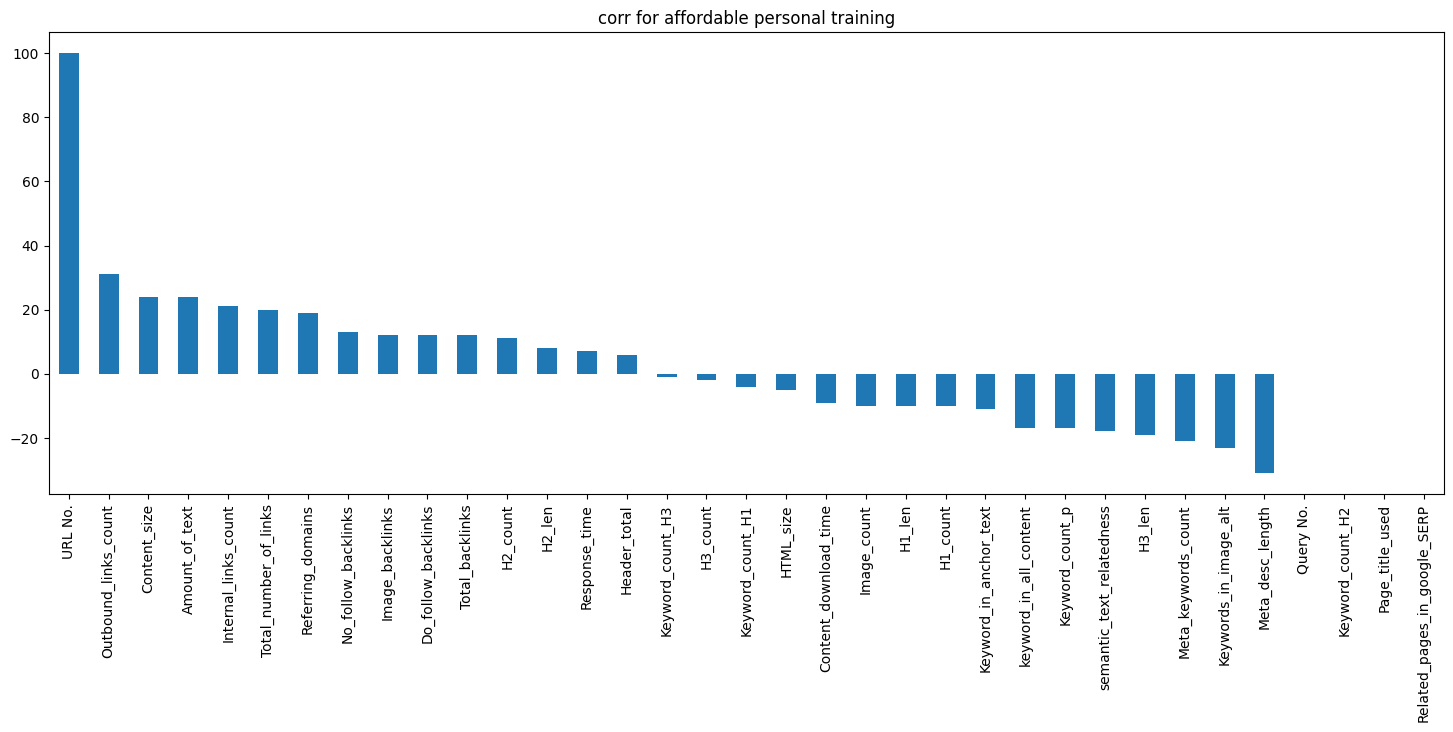

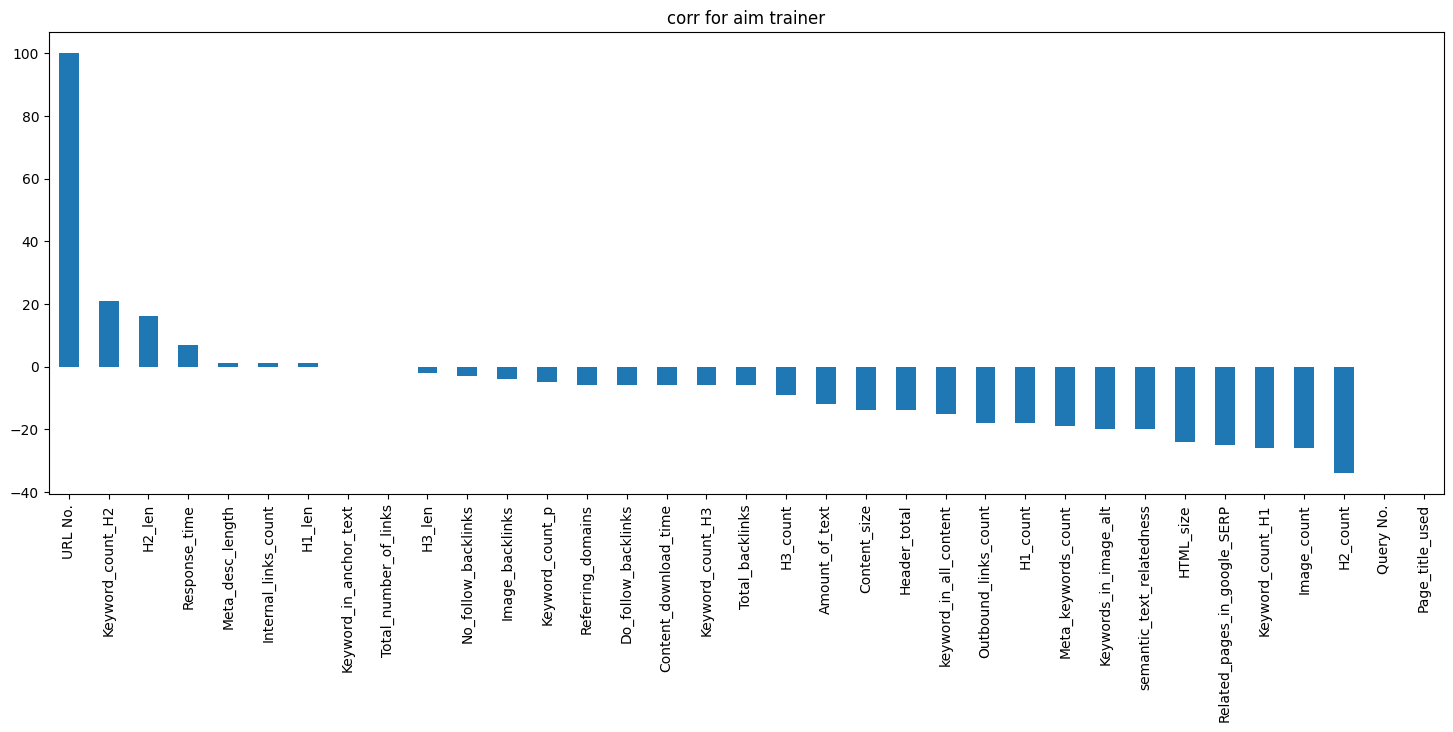

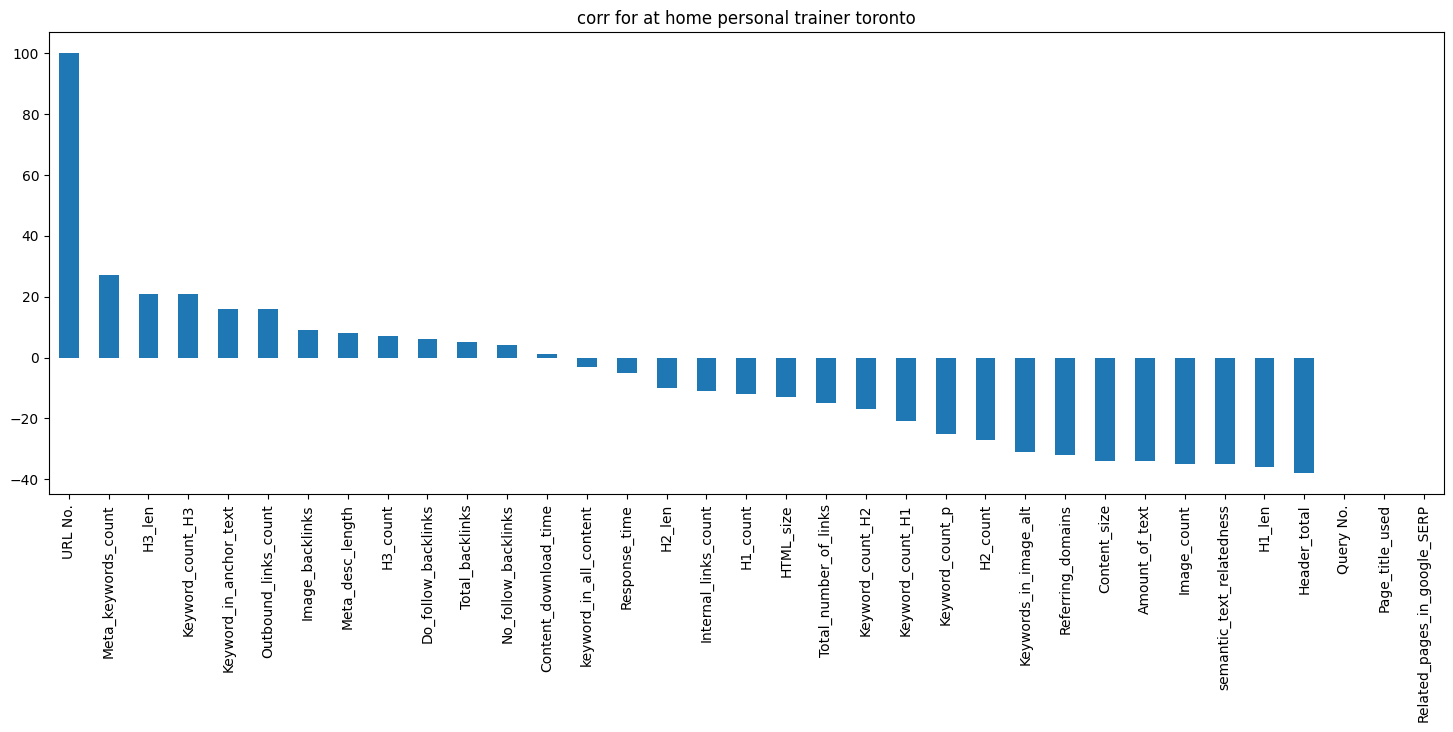

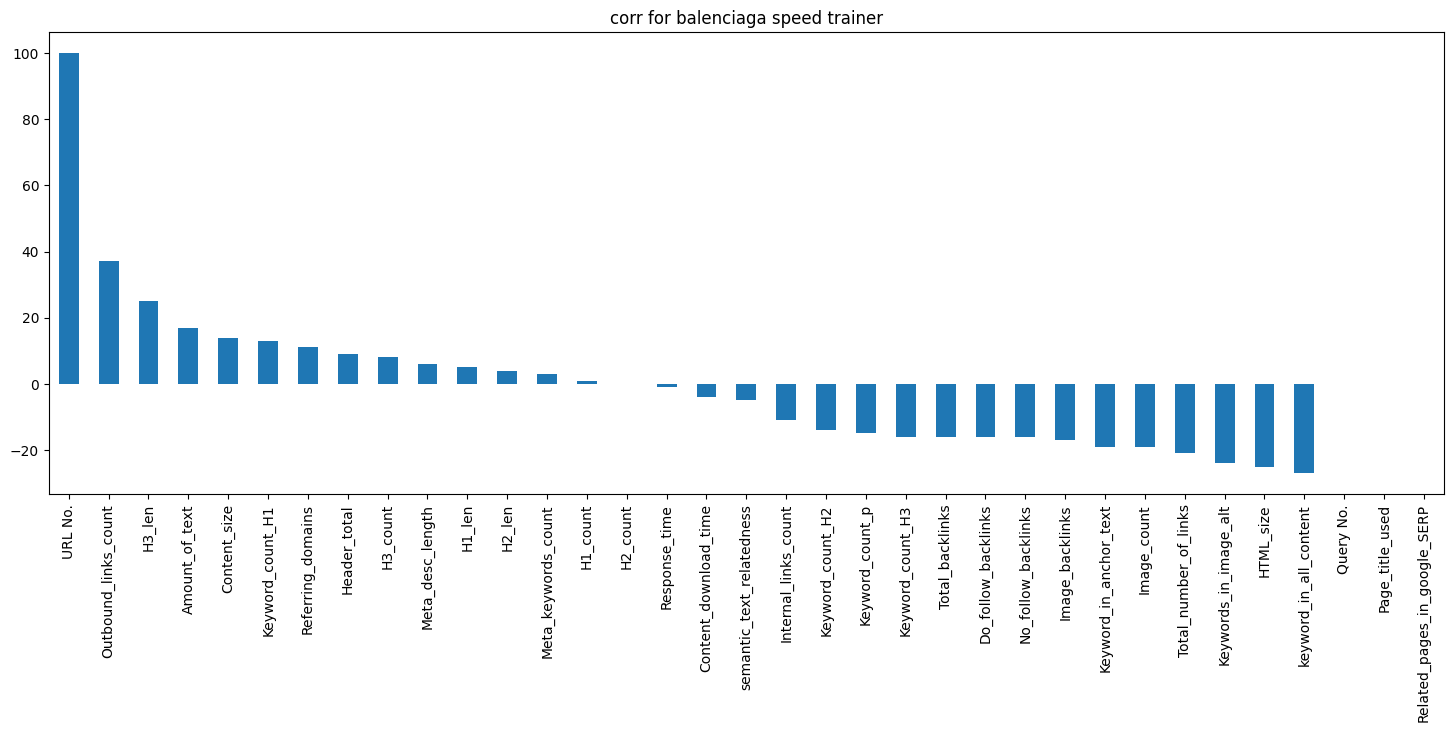

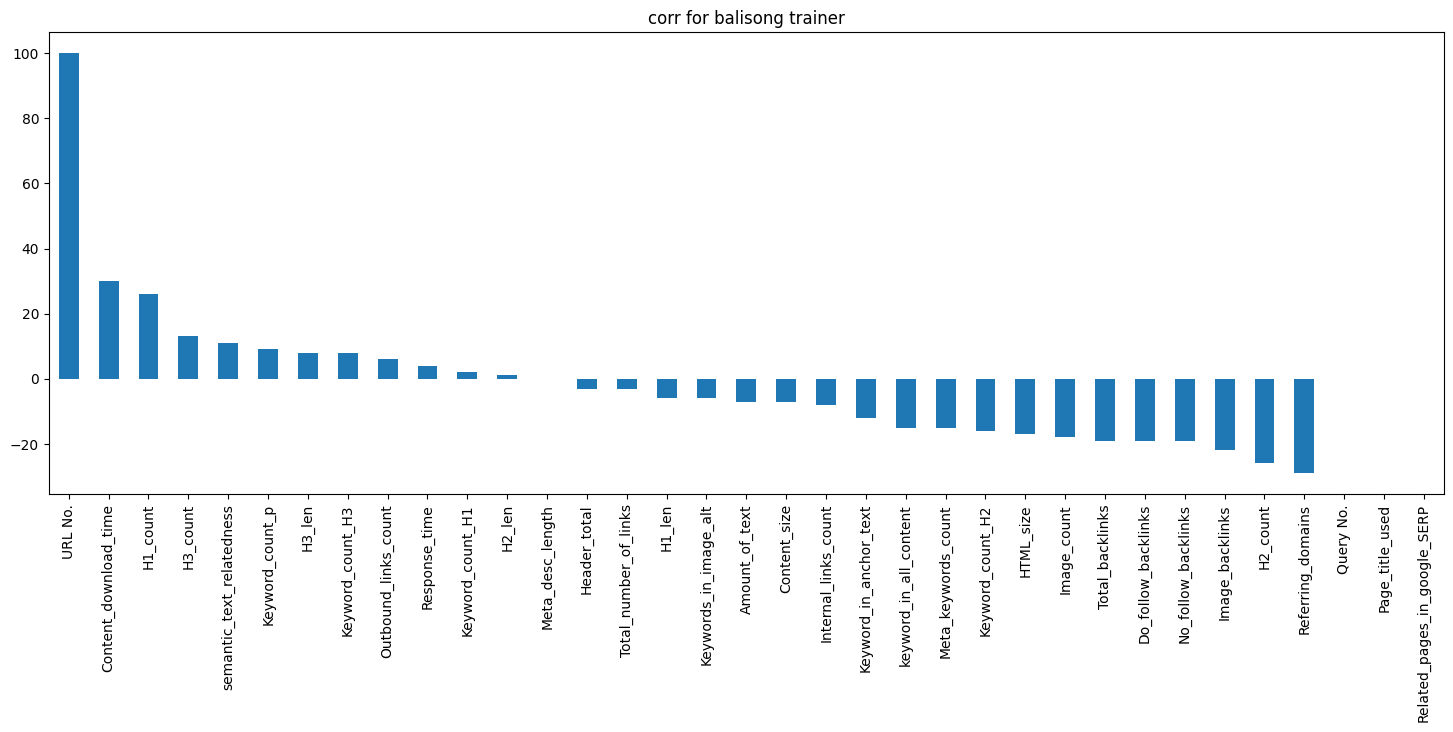

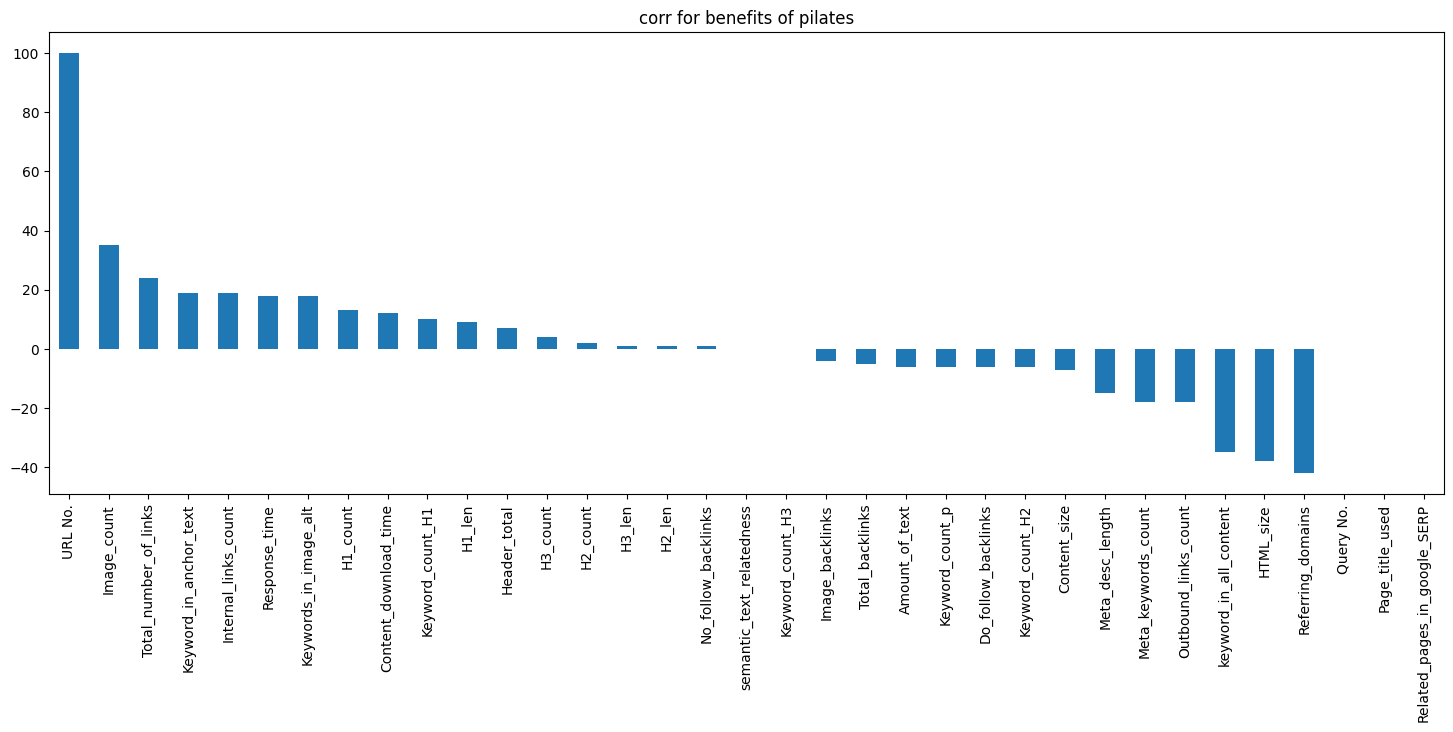

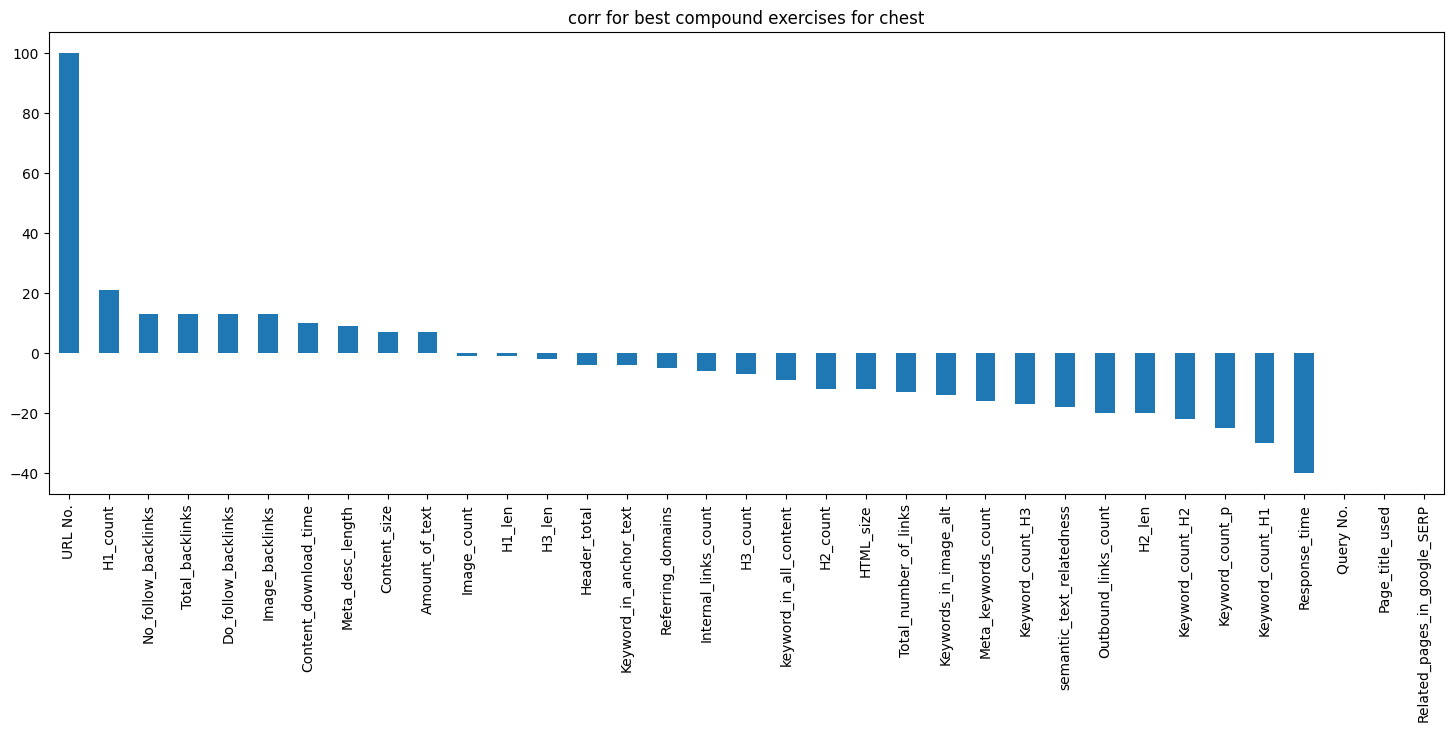

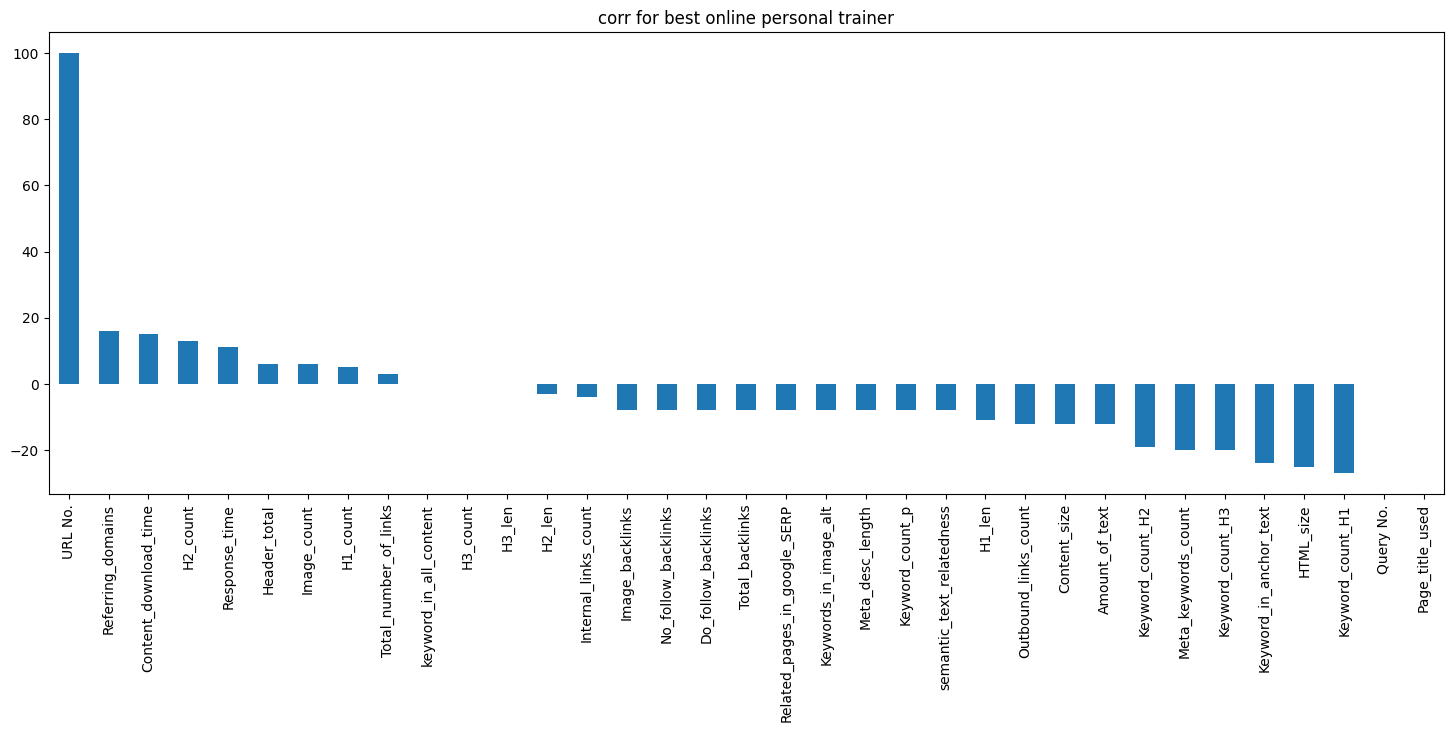

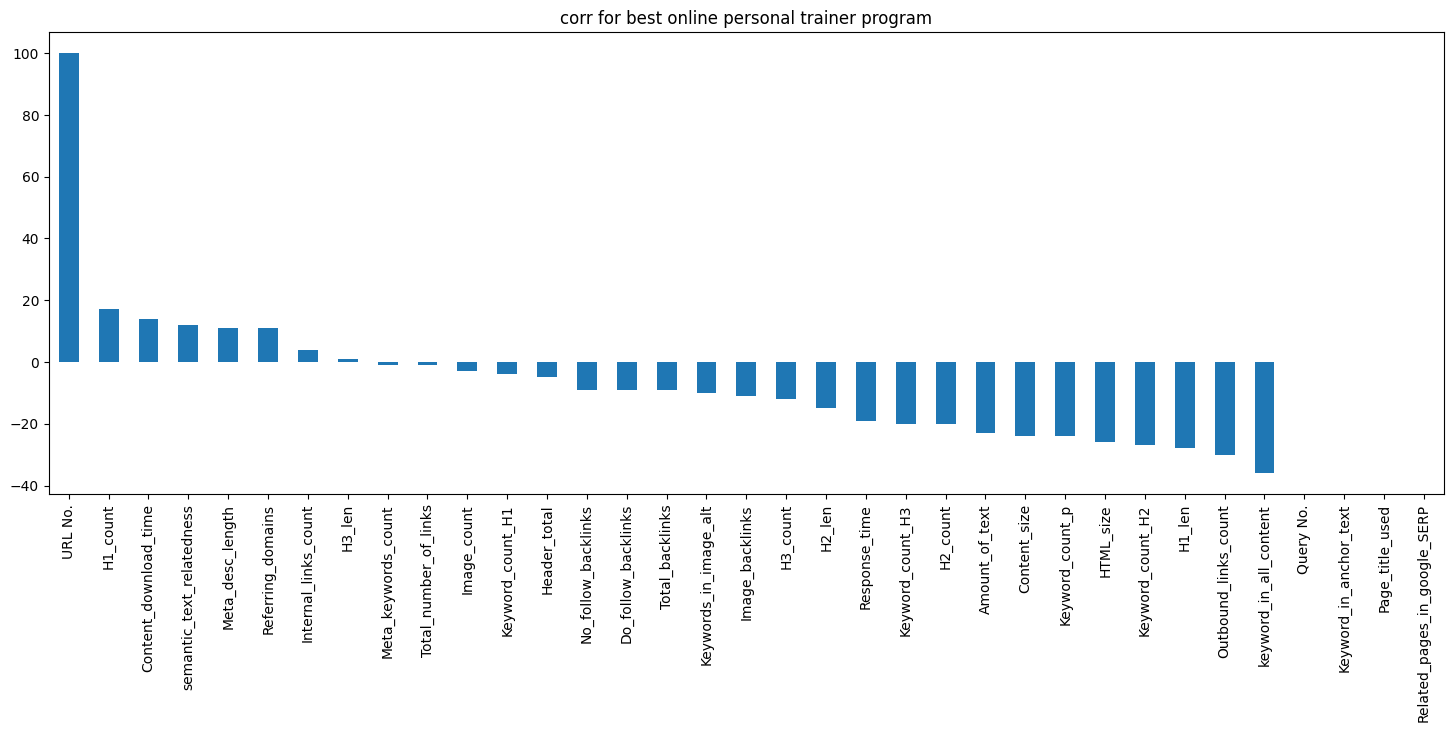

In [ ]:
# calculates corr for each query and its features 

import matplotlib.pyplot as plt

grps = data.groupby("Query") # grouping data for queries
i=1
num_of_results = 10 # num of keywords to display

for g_name , grp in grps :

  #calculating corr
  corr_ = (grp.corr().round(2)*100)["URL No."]

  print("\n\n\n corr values in for %s : \n\n" %g_name , corr_.sort_values(ascending = False) , "\n\n\n")

  plt.figure(i ,[18 , 6])
  corr_.sort_values(ascending = False).plot(kind = "bar" )
  plt.title("corr for %s"%g_name)

  i+=1
  if i==num_of_results : break

### implementing kfold CV and train test split function for learning to rank data
as our data is diffrent from other normal data we can't just use kfold to devide data  at once beacuse some we may lose some keywords for training.
<br>
so we do folding on each keyword. 
<br>
code below will extract kfolds for each query with query name. 
<br>
a dictionary will keep train and validation folds , queries will be keys (values with (train , val) format )
<br> 
functions below do the cross validation or train test split for input args

In [ ]:
from sklearn.model_selection import KFold
import random as rnd


def train_test_split_nquery(data , nquery):
  "this function gets raw data and splits data of n_query for random as test data "
  
  grps = data.groupby('Query' , sort = False) # group data by query
  grp_indices = grps.groups # getting grps names as keys and row numbers as values
 
# getting index of queries in random for test data
  n_query_list = rnd.sample( range(grps.ngroups) , nquery ) 

# getting list of test queries
  test_data = pd.DataFrame()
  test_grps_list = [list(grp_indices.keys())[query_num] for query_num in n_query_list]

# making test data 
  for grp in test_grps_list:
    test_data = pd.concat( [test_data , grps.get_group(grp)] , ignore_index = True , axis= 0, sort=False )

# getting list of train queries ( except test queries)
  train_data = pd.DataFrame()
  train_grps_list = list(grp_indices.keys())

  for grp in train_grps_list.copy():
    if grp in test_grps_list : train_grps_list.remove(grp)

# making train data
  for grp in train_grps_list:
    train_data = pd.concat( [train_data , grps.get_group(grp)] , ignore_index = True , axis= 0,
                            sort=False )


  return  train_data , test_data , train_grps_list , test_grps_list
            


# this function gets folds_dictionary which made in above cell and a desired fold number
# then concats all train data for given fold also for validation and outputs them
#in this part we concat all folded data for each query so it's ready to train. we train it with xgboost for each fold
def get_nth_fold_data( dict_folds , fold_n , grps = data.groupby("Query") ): 
  """this function gets folds_dictionary which made in below func cell and a desired fold number
then concats all train data for given fold also for validation and outputs them as x,y train and valid
using example : concat_all_val_train_data( dict_folds , 1 ) outputs data for fold number = 1 
"""

  train_fold = pd.DataFrame()
  val_fold = pd.DataFrame()

  train_temp = []
  val_temp = []
  

  for query,value in dict_folds.items(): # this loop concats all data for given fold for each query

    train_temp = grps.get_group(query).sort_index().reset_index(drop = True).iloc[list(value[0][fold_n])]
    val_temp = grps.get_group(query).sort_index().reset_index(drop = True).iloc[list(value[1][fold_n])]

    train_fold = pd.concat([ train_fold , train_temp ] , axis = 0 , ignore_index = True )
    val_fold = pd.concat([ val_fold , val_temp ] , axis = 0 , ignore_index = True )

  ################# this part gets train and valid folds and gives the x,y train and valid
  x_train = train_fold[ list(train_fold.columns) ]
  y_train = (train_fold['URL No.']-1).values

  x_valid = val_fold[ list (val_fold.columns) ]
  y_valid = (val_fold['URL No.']-1).values

  return x_train , y_train , x_valid , y_valid





#this fun extracts cross validattion indices for each fold and saving it in a dictionary

def get_all_CV_data(data , nfold = None , test_size = None):
  """ 
  this function extracts validation data for fold_n param or test data for test_size param for given raw data
  test_size param means size of test data from each query . if it extracts test data extracts %test_size of data in each query
  """

  if nfold != None and test_size != None : raise Exception("one of fold_n or test_size must be None")

  from pandas.tseries.frequencies import unique
  from sklearn.model_selection import KFold

############################
  flag = False

  if nfold != None :   # converting test size to nfold param 
    flag = True         # also flag is to check if I want to get folded data or not
  else : 
    flag = False
    nfold = round(test_size**-1)
###############################

  groups = list(data.Query) 
  unique_grps_unsorted = [ groups[index] for index in sorted(np.unique(groups , return_index=True)[1]) ]


  kfold = KFold(n_splits= nfold , shuffle = True )

  train_fold = []
  val_fold = []
  val_temp = []

  fold_dict = {} # this dictionary will keep train and validation folds , queries will be keys

##################################
  for query in unique_grps_unsorted: # initialization of fold dict
    fold_dict[query] = []
#############################

  for query in unique_grps_unsorted:  # making a dictionary with format : {"query_n": (train_folds , val_folds)}

    data_grp = data[data.Query==query]

    for train , val_data in kfold.split(data_grp):
      train_fold.append(train)
      val_fold.append(val_data)
      if flag==False : break 

    
    fold_dict[query] = (train_fold , val_fold)
    train_fold = []
    val_fold = []
    val_temp =[]

  return fold_dict
##############################################





### train , test split
as sklearn train test split does not work good when shuffle if off we need to train test split manually with above functions

In [ ]:
import random as rnd

def shuffle_each_grp(df): 

  " this function shuffles order of input dataframe in each query"

  df_shuff = pd.DataFrame()

  for name , grp in df.groupby("Query" , sort = False) : # shuffling order of test data in dict

    grp_val = grp.values ## shuffling each group
    grp_val = np.array(rnd.sample( list(grp_val) , len(grp_val) ) )

    grp_df = pd.DataFrame(grp_val , columns = list(df.columns) ) # add the shuffled group as a dataframe 

    df_shuff = pd.concat( [df_shuff , grp_df] , ignore_index = True , axis= 0,
                            sort=False)
    
  return df_shuff


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

##### getting train and test data
train_data  , test_data , train_grps_list , test_grps_list  = train_test_split_nquery(data , 5) 

##### shuffling test data
test_data_shuff = shuffle_each_grp(test_data)

#### test data we use for evaluation
test_data_final = test_data.copy()

#### defining x,y train and test
y_train = np.abs((train_data['URL No.']-1)-49).values 
y_test = np.abs((test_data_final['URL No.']-1)-49).values

X_train = train_data[ list(train_data.columns)[4:] ].values 
X_test = test_data_final[ list(test_data_final.columns)[4:] ].values

# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)



X_train.shape , X_test.shape

((9510, 33), (245, 33))

### defining ndcg metric
here we define ndcg metric and loss function from tfr library. and we do a example evaluation

In [ ]:
y_true = [[1., 3, 2.]]
y_pred = [[1500., 40., 30.]]
ndcg_met = tfr.keras.metrics.NDCGMetric() ## defining ndcg metric
print(ndcg_met(y_true, y_pred).numpy()) 

ndcg_loss = tfr.keras.losses.ApproxNDCGLoss() ## testing for a example
print(np.abs(ndcg_loss(y_true, y_pred).numpy()))



0.7363636
0.73636365


### making XGboost model

**For Tree base learners, the most common parameters are:**
<br>
**max_depth:** The maximum depth per tree. A deeper tree might increase the performance, but also the complexity and chances to overfit.
<br>
The value must be an integer greater than 0. Default is 6.
<br>
**learning_rate:** The learning rate determines the step size at each iteration while your model optimizes toward its objective. A low learning rate makes computation slower, and requires more rounds to achieve the same reduction in residual error as a model with a high learning rate. But it optimizes the chances to reach the best optimum.
The value must be between 0 and 1. Default is 0.3.
<br>
**n_estimators:** The number of trees in our ensemble. Equivalent to the number of boosting rounds.
The value must be an integer greater than 0. Default is 100.
<br>
**NB:** In the standard library, this is referred as num_boost_round.
<br>
**colsample_bytree:** Represents the fraction of columns to be randomly sampled for each tree. It might improve overfitting.
<br>
The value must be between 0 and 1. Default is 1.
<br>
**subsample:** Represents the fraction of observations to be sampled for each tree. A lower values prevent overfitting but might lead to under-fitting.
<br>
The value must be between 0 and 1. Default is 1.
**Regularization parameters:**
<br>
**alpha (reg_alpha):** L1 regularization on the weights (Lasso Regression). When working with a large number of features, it might improve speed performances. It can be any integer. Default is 0.
<br>
**lambda (reg_lambda):** L2 regularization on the weights (Ridge Regression). It might help to reduce overfitting. It can be any integer. Default is 1.
<br>
gamma: Gamma is a pseudo-regularisation parameter (Lagrangian multiplier), and depends on the other parameters. The higher Gamma is, the higher the regularization. It can be any integer. Default is 0.
<br>
https://xgboost.readthedocs.io/en/stable/parameter.html

<br>
Lasso regulizer works better when we have a lot of useless variables to reduce variance. 
<br> 
but ridge works better when most of our variables are useful

In [ ]:
import xgboost
xgboost.__version__

'1.7.5'

In [ ]:
import xgboost as xgb

try: del xgb_model
except : pass

# making a initial xgb_model and initial parameters
xgb_model = xgb.XGBRanker(   
    # tree_method='gpu_hist',
    # booster='gblinear',
    objective='rank:ndcg',
    random_state=42, 
    learning_rate=0.001,
    colsample_bytree=0.9, 
    max_depth=8, #Maximum tree depth for base learners.
    n_estimators=500, 
    subsample=0.5,
    verbosity = 2 ,
    eval_metric = "ndcg@50-",
    # max_leaves = 100,
    num_parallel_tree =3,
    #grow_policy = 0, # 0 or 1
    gamma = 0.1 , # Minimum loss reduction required to make a further partition on a leaf node of the tree.
    reg_alpha = 0.1 , # L1 linearization param (Lasso)
    # reg_lambda = 0.3    # L2 linearization param (Ridge)
    )

grps = train_data.groupby('Query').size().to_frame('size')['size'].to_numpy()

test_grp_size = test_data_final.groupby('Query').size().to_frame('size')['size'].to_numpy()

xgb_model.fit( X_train, y_train , group = grps ,  
              verbose=True
              )

[19:27:05] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 14 pruned nodes, max_depth=7
[19:27:05] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 10 pruned nodes, max_depth=8
[19:27:05] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 14 pruned nodes, max_depth=8
[19:27:05] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 6 pruned nodes, max_depth=8
[19:27:05] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 78 extra nodes, 6 pruned nodes, max_depth=8
[19:27:05] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 10 pruned nodes, max_depth=8
[19:27:06] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 14 pruned nodes, max_depth=8
[19:27:06] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 6 pruned nodes, max_depth=8
[19:27:06] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 6 pruned nodes,

XGBRanker(base_score=None, booster=None, callbacks=None, colsample_bylevel=None,
          colsample_bynode=None, colsample_bytree=0.9,
          early_stopping_rounds=None, enable_categorical=False,
          eval_metric='ndcg@50-', feature_types=None, gamma=0.1, gpu_id=None,
          grow_policy=None, importance_type=None, interaction_constraints=None,
          learning_rate=0.001, max_bin=None, max_cat_threshold=None,
          max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
          max_leaves=None, min_child_weight=None, missing=nan,
          monotone_constraints=None, n_estimators=500, n_jobs=None,
          num_parallel_tree=3, objective='rank:ndcg', predictor=None, ...)

### evaluation part

In [ ]:
def predict(model, test_df):
  predict_data_dict = {}

  for name , grp in test_df.groupby("Query"):

    predict_data_dict[name] = []
    predict_data_dict[name].append( model.predict( grp[list(grp.columns)[4:]].values ) )
  
  return predict_data_dict
  


def get_relavant_order(list_ , reverse_order = False): # this function gives relevant score
  "this function gives relevant score of input list gives 0 to highest number in the same index and opposite for lowest "

  list_temp = list_.copy()
  relav_dict = {}

  for i in range(len(list_temp)):

    relav_dict[ min(list_temp) ] = i
    list_temp.remove( min(list_temp) )
  
  relav_list = [float(j) for j in [relav_dict[i] for i in list_].copy() ].copy()

  if reverse_order: return list(np.abs(np.array(relav_list)-max(relav_list))).copy()
  else: return relav_list



In [ ]:
test_est_dict = predict( xgb_model , test_data_final )

In [ ]:
# test_data_final.groupby("Query").get_group('balenciaga speed trainer')['URL No.'].values.astype('float32')

In [ ]:
# test_est_dict['balenciaga speed trainer'][0]

In [ ]:
# test_est_temp

#### calculating ndcg metric for each group test

In [ ]:
# returns ndcg metric for each test query also mean of all ndcgs
def ndcg_test_queries(test_est_dict , test_data_real_df):
  ndcg_test_met = {}
  test_est_temp = []
  test_real_temp = []

  for key in test_est_dict.keys():
  
    test_est_temp =  get_relavant_order( list(test_est_dict[key][0]).copy() , False ).copy()

    urls = test_data_real_df.groupby("Query").get_group(key)['URL No.'].copy()
    test_real_temp = list( np.abs(urls - max(urls)).astype('float32') ).copy() # order must reversed because model trained with reverse order

    ndcg_test_met[key] = np.abs(ndcg_loss( [test_real_temp].copy() , [test_est_temp].copy() ).numpy()).round(3)

    print("\n\n\n%s\nestimated: "%key,test_est_temp,"\n     real: ",
            test_real_temp,"\n\nndcg: ",ndcg_test_met[key])
  
  ndcg_mean =  np.array(list(ndcg_test_met.values())).mean()
  print("\n\nndcg mean is :  ", ndcg_mean)
  return ndcg_test_met ,  ndcg_mean

In [ ]:
# testing ndcg for model initialize
ndcg_dict , ndcg_mean = ndcg_test_queries(test_est_dict , test_data_final)




nutritionist course online canada
estimated:  [12.0, 6.0, 9.0, 31.0, 44.0, 8.0, 39.0, 24.0, 32.0, 21.0, 3.0, 36.0, 25.0, 2.0, 38.0, 4.0, 49.0, 47.0, 7.0, 14.0, 40.0, 15.0, 27.0, 10.0, 30.0, 13.0, 43.0, 17.0, 23.0, 35.0, 26.0, 28.0, 16.0, 29.0, 33.0, 11.0, 1.0, 0.0, 5.0, 42.0, 48.0, 41.0, 19.0, 22.0, 37.0, 18.0, 20.0, 46.0, 34.0, 45.0] 
     real:  [49.0, 48.0, 47.0, 46.0, 45.0, 44.0, 43.0, 42.0, 41.0, 40.0, 39.0, 38.0, 37.0, 36.0, 35.0, 34.0, 33.0, 32.0, 31.0, 30.0, 29.0, 28.0, 27.0, 26.0, 25.0, 24.0, 23.0, 22.0, 21.0, 20.0, 19.0, 18.0, 17.0, 16.0, 15.0, 14.0, 13.0, 12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0, 0.0] 

ndcg:  0.254



pilates at home workout
estimated:  [43.0, 42.0, 44.0, 49.0, 34.0, 16.0, 47.0, 33.0, 40.0, 31.0, 45.0, 38.0, 22.0, 28.0, 37.0, 30.0, 10.0, 36.0, 21.0, 15.0, 23.0, 3.0, 41.0, 48.0, 32.0, 29.0, 27.0, 20.0, 6.0, 18.0, 1.0, 12.0, 2.0, 35.0, 5.0, 39.0, 11.0, 9.0, 25.0, 4.0, 0.0, 7.0, 19.0, 46.0, 13.0, 8.0, 14.0, 26.0, 24.0, 17.0] 
     real:

### hyper parameter optimization using CV and 

In [ ]:
from sklearn.model_selection import KFold

def CV_nquery(train_df , nfold = 10 ):

  train_valid_queries = []
  val_data_list = []
  train_data_list = []

  unique_queries = train_df['Query'].unique()
  kfold = KFold(nfold)

  train_df_temp = pd.DataFrame()
  valid_df_temp = pd.DataFrame()

  for train,valid in kfold.split(unique_queries):
    train_queries = [unique_queries[ind] for ind in train ]
    valid_queries = [unique_queries[ind] for ind in valid ]

    for tq in train_queries :
      train_df_temp = pd.concat( [train_df_temp , train_df.groupby( 'Query').get_group(tq)],
                               0 , ignore_index = True)
    for vq in valid_queries :
      valid_df_temp = pd.concat( [valid_df_temp ,train_df.groupby( 'Query').get_group(vq)],
                               0 , ignore_index = True)
    train_valid_queries.append( (train_df_temp , valid_df_temp) )
  
  return train_valid_queries
  

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

num_of_folds = 10

# range of parameters to grid search
params = { 'max_depth': [6, 8, 10],
           'subsample': np.arange(0.2, 1.0, 0.2),
          #  'colsample_bytree': np.arange(0.4, 1.0, 0.1),
          #  'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [200, 500, 1000, 1500, 2000],
           'num_parallel_tree' :[1,3,5], 
            'grow_policy' : [0,1],
            'gamma' : np.arange(0,0.8,0.2), 
            'reg_alpha' :np.arange(0,1,0.1)
           }
           

clf = RandomizedSearchCV(estimator=xgb_model,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=30,
                         verbose=1)


train_val_Qs = CV_nquery( train_data , num_of_folds )

best_all_folds = {}
ndcg_for_folds = {}



for fold in range(num_of_folds):

  train_data_fold , valid_data_fold = train_val_Qs[fold]
###########################
  X_train_ = x_train_[ list(x_train_.columns)[4:] ].values
  X_valid = x_valid[ list(x_valid.columns)[4:] ].values

  clf.fit( X_train_ , y_train )

  best_all_folds.append( (clf.best_params_ , clf.best_score_) )
  ndcg_for_folds.append(ndcg_met( y_valid , clf.predict(x_valid) ))


  


### SHAP value and feature importance

**5.5 Model Monitoring and Updating**
Within Quality
 Management approaches, it is common to use statistical monitoring techniques where key quality variables
are monitored within bounds related to the natural or inherent (“common cause”) variation in the system. These approaches
are also used for monitoring specialized analytical equipment (e.g., specialized chemical analyses for monitoring quality or
testing for illicit substances). In conventional quality monitoring approaches, the algorithms are used to monitor for shifts in
operation, or calibration (in the case of chemical analytical equipment) or other inputs such as raw material qualities.
<br>
We plan to extend this approach to monitoring of SEO performance and the predictive capability of our estimated model by
periodically running limited online experiments and monitoring the ranking placement, while establishing bounds of typical
variation in the ranking empirically using both the data collected and used for training and validation, as well as periodic
monitoring of placement. If the ranking performance or model prediction deviates beyond a certain threshold capturing this
common cause variation, the model estimation cycle will be reported and SEO will be performed again on our pages. This
should provide a distinctive advantage for Happy Trainers by ensuring that the SEO of Happy Trainers remains current in the
presence of possible, unknown modifications to ranking algorithms (e.g., by Google), and/or SEO conducted by competing
web pages which can serve to “crowd” the ranking produced by Google SEO algorithms. To our knowledge, this constitutes
a novel approach to monitoring and ensuring current SEO placements.
<br>
6.
**Framework Construction**
After we selected the model that can help us know which factors are more important in SEO, we should construct a
framework. In this framework, we explain the prediction of ranks with the selected model by creating a feature importance
table to show and rank the importance of each factor. In more details, more important features have a higher impact on the
webpage’s rank, and online marketers can use this table to prioritize their plans. Also, we visualize our explanation using
some techniques like SHAP (SHapley Additive exPlanations) values. SHAP values help us better understand complex
machine learning models [27].
<br>
The feature importance shows us which features have a higher impact on the rank of a webpage in search engine results, and
SHAP values define this impact is positive or negative. Also, we try to provide actionable insights for online marketers and
content creators and explain the results in a clear and simple way and help them how to use the model for different industries
and keywords. Based on these results, online marketers know where to focus and which features are more important and
should be improved as a higher priority when they want their webpages to appear on the first Google search results.

#### feature importance

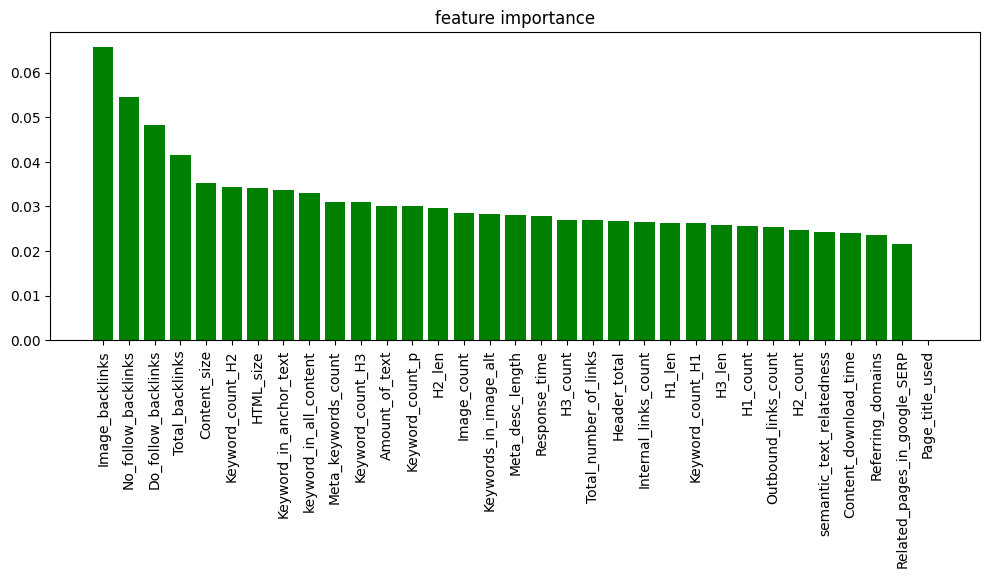

,Image_backlinks,No_follow_backlinks,Do_follow_backlinks,Total_backlinks,Content_size,Keyword_count_H2,HTML_size,Keyword_in_anchor_text,keyword_in_all_content,Meta_keywords_count,...,Keyword_count_H1,H3_len,H1_count,Outbound_links_count,H2_count,semantic_text_relatedness,Content_download_time,Referring_domains,Related_pages_in_google_SERP,Page_title_used
0,0.065804,0.054624,0.048251,0.041504,0.035358,0.034315,0.034131,0.033723,0.032989,0.031034,...,0.02618,0.025857,0.025691,0.025443,0.024669,0.024207,0.023948,0.023678,0.021652,0.0


In [ ]:
import matplotlib.pyplot as plt

feat_imp_dict = {}

for col,imp in zip( list(train_data.columns)[4:] , list(xgb_model.feature_importances_) ):
  feat_imp_dict[col] = [imp]

sorted_cols = sorted(feat_imp_dict , key = lambda x : feat_imp_dict[x] , reverse= True )

plt.figure(1 , figsize = [12 , 4])
plt.bar(sorted_cols ,  np.array([ feat_imp_dict[col][0] for col in sorted_cols]) , color = "green")
plt.xticks(rotation=90 )
plt.title("feature importance")
plt.show()

pd.DataFrame(feat_imp_dict).sort_values(by = [0] , axis = 1 , ascending = False)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 15.3 MB/s eta 0:00:00


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


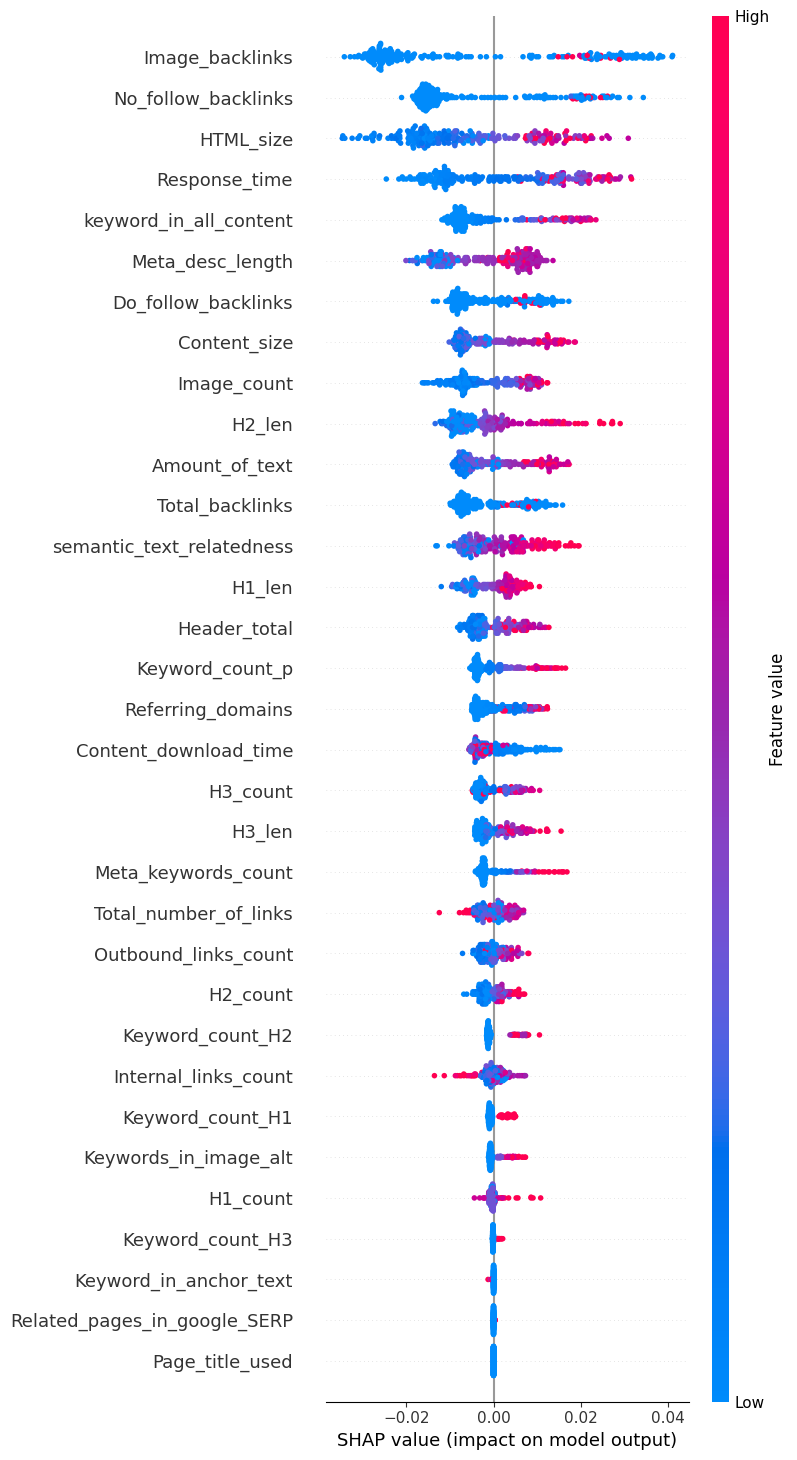

In [ ]:
!pip install shap
import shap

explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test ,feature_names = list(train_data.columns)[4:], max_display =40)
